# MOwNiT – aproksymacja średniokwadratowa trygonometryczna

__Przygotował:__
__Szymon Budziak__

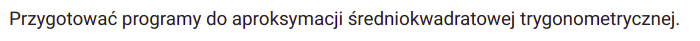

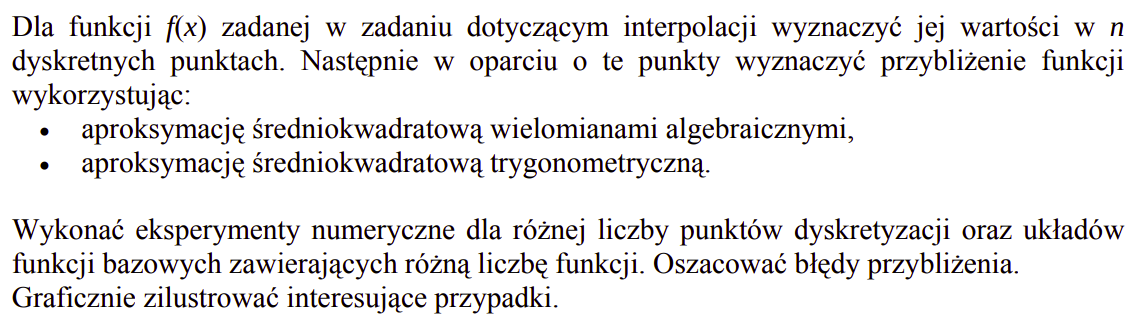

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

## Function to interpolate

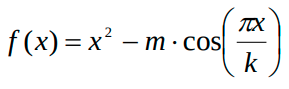

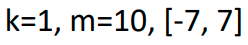

In [2]:
def func(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

**Plot of the function**

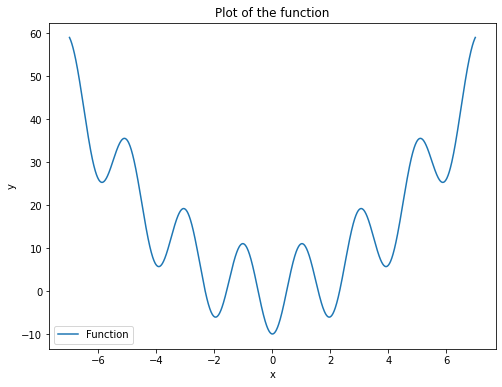

In [3]:
plt.figure(figsize=(8,6))
X = np.arange(-7, 7+0.01, 0.01)
plt.plot(X, func(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Visualization

In [4]:
def visualize(x, y, start, stop, n, m, function):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(start, stop + 0.01, 0.01)
    plt.plot(X, func(X), label="Function", color="red")
    plt.plot(X, function(X), label="Trigonometric approximation", color="blue")
    plt.title(f"Trigonometric approximation on {n} nodes and and m={m}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Errors

In [5]:
def max_error(Y1, Y2):
    return max([abs(Y1[i] - Y2[i]) for i in range(len(Y1))])

In [6]:
def sum_square_error(Y1, Y2):
    return sum([(Y1[i] - Y2[i])**2 for i in range(len(Y1))])

## Trigonometric approximation

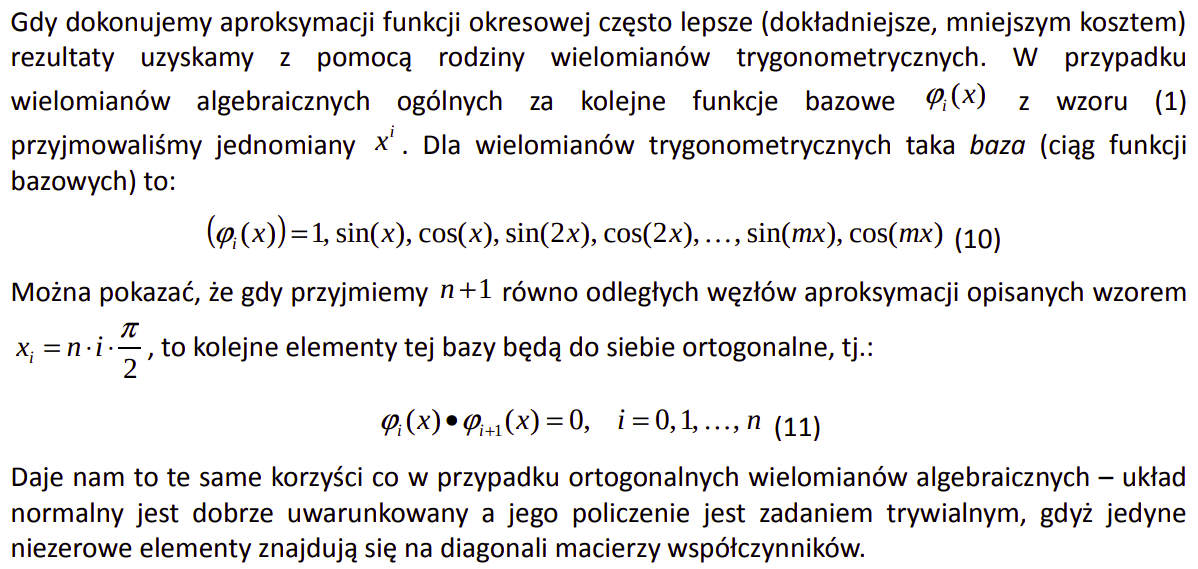

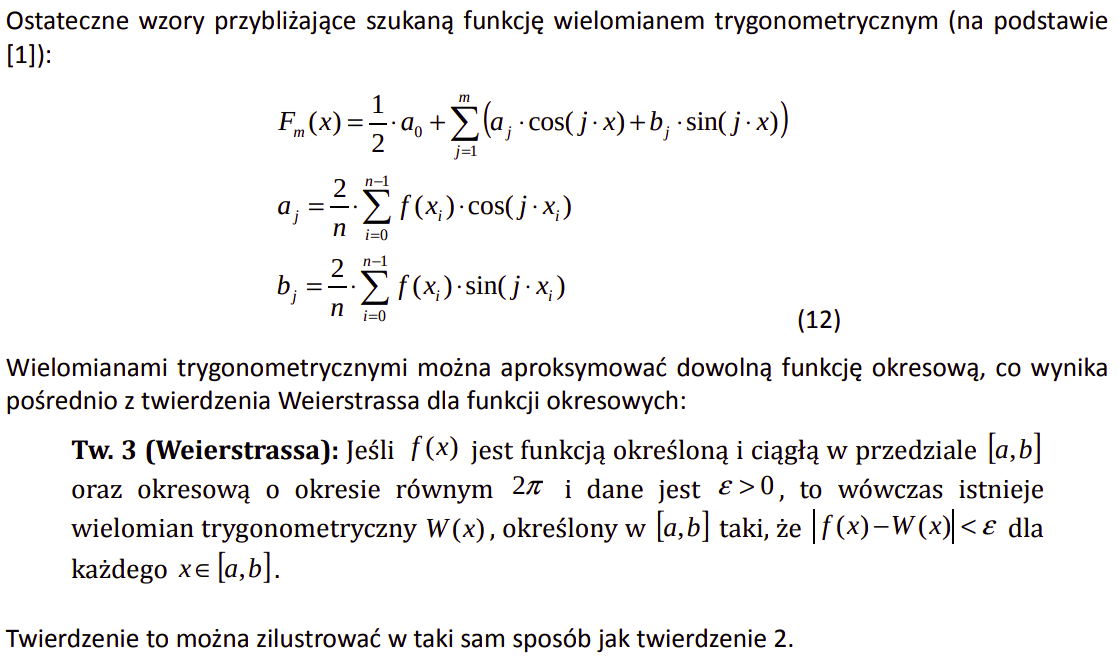

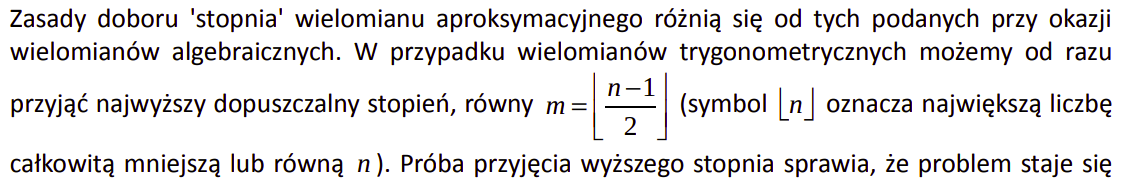

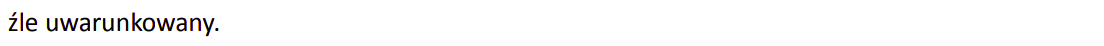

In [7]:
class TrigonometricApproximation:
    def __init__(self, X, Y, n, m, start, stop):
        if m > np.floor((n-1)/2):
            raise Exception("m cannot be greater than floor of (n-1)/2")
        self.X = X
        self.Y = Y
        self.n = n
        self.m = m
        self.start = start
        self.stop = stop
        self.A = np.zeros(self.n)
        self.B = np.zeros(self.n)
        self.scale_to_2pi()
        self.compute_A_and_B()
        self.scale_from_2pi()

    def scale_to_2pi(self):
        range_length = self.stop - self.start
        for i in range(len(self.X)):
            self.X[i] /= range_length
            self.X[i] *= 2 * np.pi
            self.X[i] += -np.pi - (2 * np.pi * self.start / range_length)

    def compute_A_and_B(self):
        for i in range(self.n):
            ai = sum(self.Y[j] * np.cos(i * self.X[j]) for j in range(self.n))
            bi = sum(self.Y[j] * np.sin(i * self.X[j]) for j in range(self.n))
            self.A[i] = 2 * ai / self.n
            self.B[i] = 2 * bi / self.n

    def scale_from_2pi(self):
        range_length = self.stop - self.start
        for i in range(len(self.X)):
            self.X[i] -= -np.pi - (2 * np.pi * self.start / range_length)
            self.X[i] /= 2 * np.pi
            self.X[i] *= range_length

    def scale_point_to_2pi(self, x):
        range_length = self.stop - self.start
        x /= range_length
        x *= 2 * np.pi
        x += -np.pi - (2 * np.pi * self.start / range_length)
        return x

    def approximate(self, X):
        points = []
        for x in X:
            cp_x = deepcopy(x)
            cp_x = self.scale_point_to_2pi(cp_x)
            approximated_x = 1 / 2 * self.A[0] + sum(self.A[j] * np.cos(j * cp_x) + self.B[j] * np.sin(j * cp_x)
                                                     for j in range(1, self.m + 1))
            points.append(approximated_x)
        return points

In [8]:
def trig_approximation(start, stop, n, m):
    X = np.linspace(start, stop, n)
    Y = func(X)
    trigonometric_approximation = TrigonometricApproximation(X, Y, n, m, start, stop)
    visualize(X, Y, start, stop, n, m, trigonometric_approximation.approximate)

n = 10 and m = 4

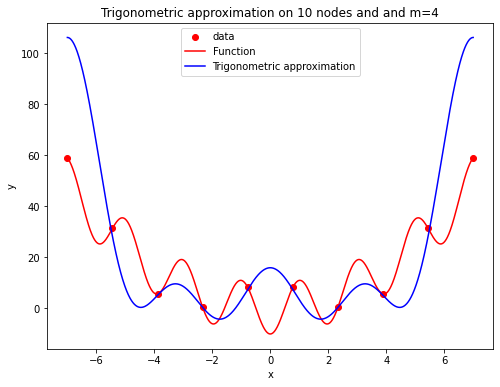

In [9]:
trig_approximation(-7, 7, 10, 4)

n = 15 and m = 5

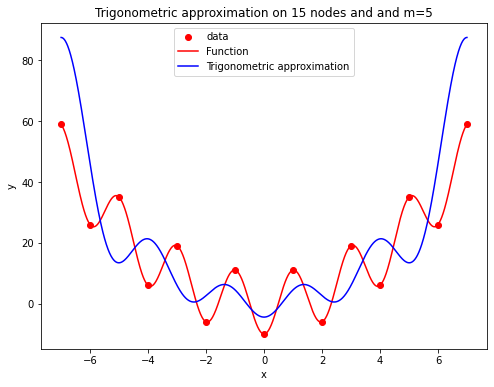

In [10]:
trig_approximation(-7, 7, 15, 5)

n = 15 and m = 7

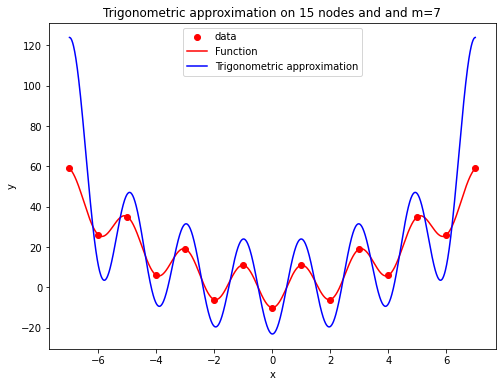

In [11]:
trig_approximation(-7, 7, 15, 7)

n = 20 and m = 9

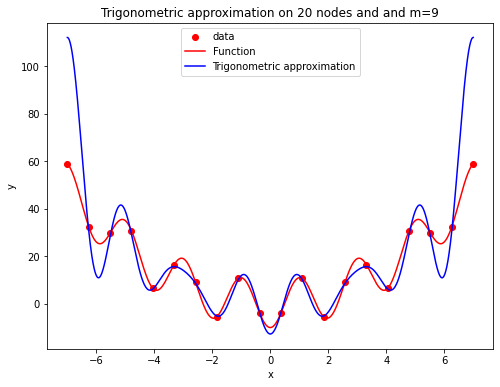

In [12]:
trig_approximation(-7, 7, 20, 9)

n = 25 and m = 12

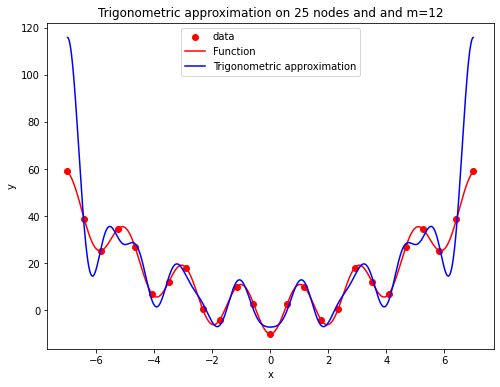

In [13]:
trig_approximation(-7, 7, 25, 12)

n = 30 and m = 8

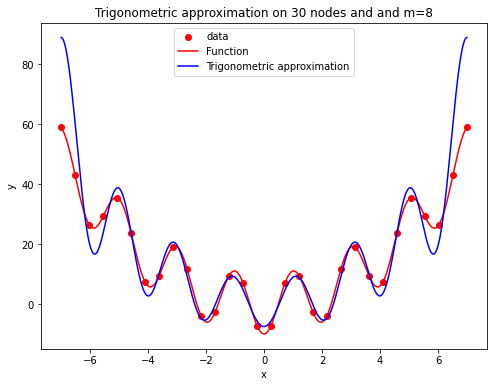

In [14]:
trig_approximation(-7, 7, 30, 8)

n = 30 and m = 14

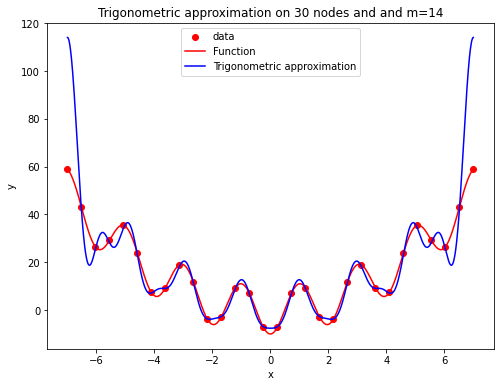

In [15]:
trig_approximation(-7, 7, 30, 14)

n = 50 and m = 24

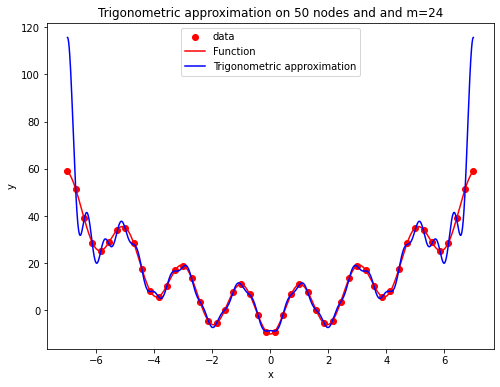

In [16]:
trig_approximation(-7, 7, 50, 24)

n = 80 and m = 30

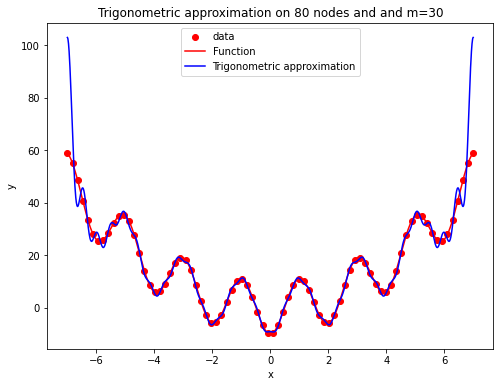

In [17]:
trig_approximation(-7, 7, 80, 30)

n = 100 and m = 37

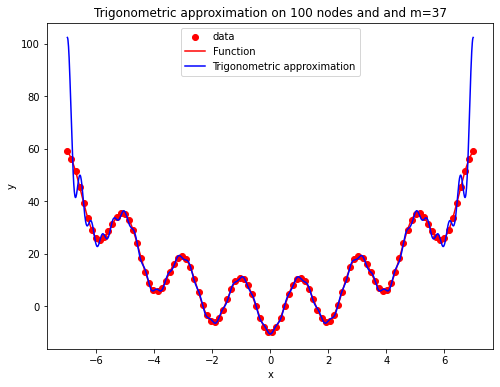

In [18]:
trig_approximation(-7, 7, 100, 37)

## Examples of approximation for a specific number of nodes

In [19]:
def calculate_approximation_for_example(start, stop, nodes, m):
    max_error_result = np.zeros((len(nodes), len(m)))
    sum_square_error_result = np.zeros((len(nodes), len(m)))
    total_X = np.linspace(start, stop, 1000)
    func_val = func(total_X)

    for n_idx, n in enumerate(nodes):
        X = np.linspace(start, stop, n)
        Y = func(X)
        for m_idx, i in enumerate(m):
            if i > np.floor((n - 1) / 2):
                max_error_result[n_idx][m_idx] = np.nan
                sum_square_error_result[n_idx][m_idx] = np.nan
            else:
                trigonometric_approximation = TrigonometricApproximation(X, Y, n, i, start, stop)
                trig_appr_result = trigonometric_approximation.approximate(total_X)
                max_error_result[n_idx][m_idx] = max_error(trig_appr_result, func_val)
                sum_square_error_result[n_idx][m_idx] = sum_square_error(trig_appr_result, func_val)
    max_error_df = pd.DataFrame(data=max_error_result, index=nodes, columns=m)
    sum_square_error_df = pd.DataFrame(data=sum_square_error_result, index=nodes, columns=m)
    return max_error_df, sum_square_error_df

Przykład dla liczby węzłów 10 i stopnia wielomianu: 1, 2, 3, 4

In [20]:
me_10_df, sse_10_df = calculate_approximation_for_example(-7, 7, [10],
                                                            [1, 2, 3, 4])

In [21]:
me_10_df

,1,2,3,4
10,22.539881,39.249991,45.892972,52.11391


In [22]:
print(me_10_df.idxmin(axis=1))
print(me_10_df.min(axis=1))

10    1
dtype: int64
10    22.539881
dtype: float64


In [23]:
sse_10_df

,1,2,3,4
10,147367.072377,357846.461128,434183.624508,516434.937731


In [24]:
print(sse_10_df.idxmin(axis=1))
print(sse_10_df.min(axis=1))

10    1
dtype: int64
10    147367.072377
dtype: float64


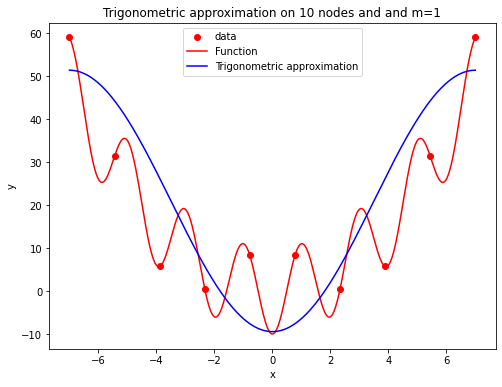

In [25]:
trig_approximation(-7, 7, 10, 1)

Przykład dla liczby węzłów 200 i stopnia wielomianu: 2, 3, 5, 10, 14, 20, 24, 30, 40, 50, 60, 70, 80

In [26]:
me_200_df, sse_200_df = calculate_approximation_for_example(-7, 7, [200],
                                                            [2, 3, 5, 10, 14, 20, 24, 30, 40, 50, 60, 70, 80])

In [27]:
me_200_df

,2,3,5,10,14,20,24,30,40,50,60,70,80
200,16.569658,13.782498,11.811439,5.188285,7.476985,11.09689,13.52362,17.176947,23.180499,29.19537,35.179331,41.146298,47.103523


In [28]:
print(me_200_df.idxmin(axis=1))
print(me_200_df.min(axis=1))

200    10
dtype: int64
200    5.188285
dtype: float64


In [29]:
sse_200_df

,2,3,5,10,14,20,24,30,40,50,60,70,80
200,58506.824609,56158.433673,55339.089941,1752.955688,2447.272582,3551.367146,4308.306819,5467.850282,7459.567786,9522.985899,11657.551962,13863.291535,16140.449756


In [30]:
print(sse_200_df.idxmin(axis=1))
print(sse_200_df.min(axis=1))

200    10
dtype: int64
200    1752.955688
dtype: float64


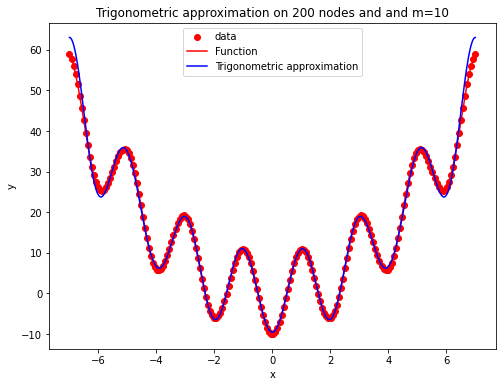

In [31]:
trig_approximation(-7, 7, 200, 10)

Przykład dla liczby węzłów 200 i stopnia wielomianu: 2, 3, 5, 10, 12, 14, 20, 40, 60, 80, 100, 150, 200, 249

In [32]:
me_500_df, sse_500_df = calculate_approximation_for_example(-7, 7, [500],
                                                            [2, 3, 5, 10, 12, 14, 20, 40, 60, 80, 100, 150, 200, 249])

In [33]:
me_500_df

,2,3,5,10,12,14,20,40,60,80,100,150,200,249
500,17.334636,14.896237,12.392242,2.187909,2.512382,2.894807,4.21323,9.038555,13.848415,18.655251,23.429842,35.310301,47.160238,58.764


In [34]:
print(me_500_df.idxmin(axis=1))
print(me_500_df.min(axis=1))

500    10
dtype: int64
500    2.187909
dtype: float64


In [35]:
sse_500_df

,2,3,5,10,12,14,20,40,60,80,100,150,200,249
500,58257.612126,55773.713469,54675.340717,324.599839,358.552684,404.348625,567.81715,1184.450533,1852.498768,2565.901079,3324.161927,5415.676048,7787.136401,10383.390433


In [36]:
print(sse_500_df.idxmin(axis=1))
print(sse_500_df.min(axis=1))

500    10
dtype: int64
500    324.599839
dtype: float64


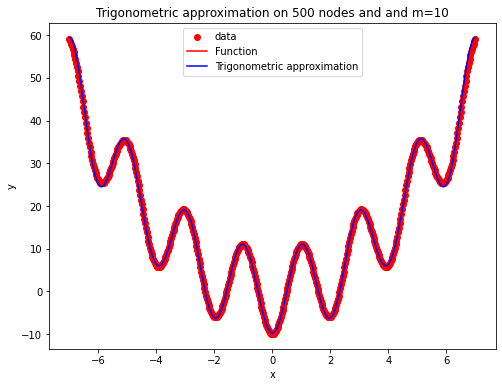

In [37]:
trig_approximation(-7, 7, 500, 10)

## Error for trigonometric approximation

In [38]:
def calculate_error(start, stop, m):
    nodes = [5, 7, 10, 20, 30, 50, 80, 100]
    result = [None for _ in range(2 * len(m) * len(nodes))]

    total_X = np.linspace(start, stop, 1000)
    func_val = func(total_X)
    idx = 0

    for n in nodes:
        X = np.linspace(start, stop, n)
        Y = func(X)
        for i in m:
            if i > np.floor((n-1)/2):
                result[idx] = np.nan
                result[idx+1] = np.nan
            else:
                trigonometric_approximation = TrigonometricApproximation(X, Y, n, i, start, stop)
                trig_appr_result = trigonometric_approximation.approximate(total_X)
                result[idx] = max_error(trig_appr_result, func_val)
                result[idx + 1] = sum_square_error(trig_appr_result, func_val)
            idx += 2
    df = pd.DataFrame(data={"n": [val for val in nodes for _ in range(len(m))],
                            "m": m * len(nodes),
                            "trig approximation max error": result[::2],
                            "trig approximation sum square error": result[1::2]})
    return df

In [39]:
df = calculate_error(-7, 7, [2, 3, 5, 10, 14, 20, 24])
df

,n,m,trig approximation max error,trig approximation sum square error
0,5,2,69.279527,1.058390e+06
1,5,3,NaN,NaN
2,5,5,NaN,NaN
3,5,10,NaN,NaN
4,5,14,NaN,NaN
5,5,20,NaN,NaN
6,5,24,NaN,NaN
7,7,2,52.005052,5.633885e+05
8,7,3,62.719512,7.491609e+05
9,7,5,NaN,NaN


In [40]:
print(df["trig approximation max error"].idxmin())
print(df["trig approximation sum square error"].idxmin())

52
52


Dzięki max error oraz sum square error możemy znaleźć najlepszy wielomian (jego stopień) który aproksymuje naszą funkcję. Rozpatrzyliśmy to dla węzłów: 5, 7, 10, 20, 30, 50, 80, 100 oraz stopnia wielomianu (m): 2, 3, 5, 10, 14, 20, 24. W naszym przypadku jest to wielomian z liczbą węzłów równoodległych 100 i stopniem wielomianu 10 dla max error i sum square error.

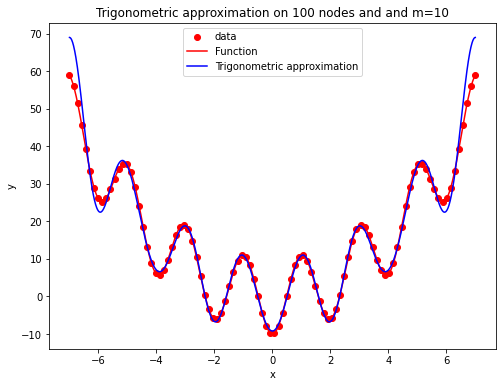

In [41]:
trig_approximation(-7, 7, 100, 10)

Przykładowe aproksymacje dla większych n oraz m:

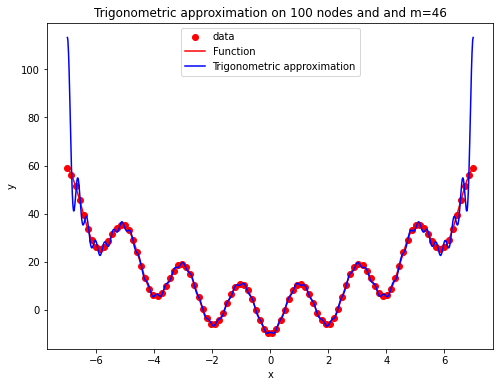

In [42]:
trig_approximation(-7, 7, 100, 46)

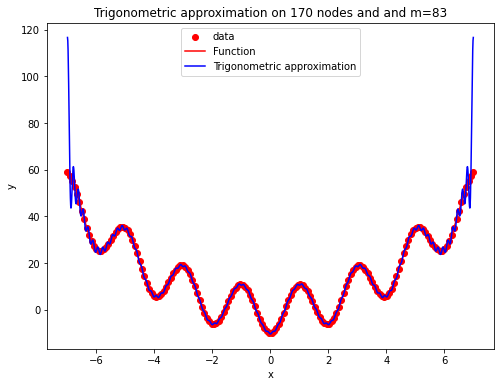

In [43]:
trig_approximation(-7, 7, 170, 83)

## Efekt Rungego

Możemy zauważyć, że w przypadku aproksymacji średniokwadratowej trygonometrycznej nie występuje efekt Rungego.